Summary for dissertation

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import os
import json


import warnings
warnings. filterwarnings('ignore')

In [2]:
attacks = ['horizontal', 'vertical', 'flipping', 'superset']
datasets = ['nursery','german_credit','breast_cancer_w', 'breastcancer']

In [3]:
# fixed parameters: gamma=1.25(80%), xi=1, fp_len=32

In [4]:
# load results
false_miss = {'horizontal': dict(), 'vertical': dict(), 
              'flipping': dict(), 'superset': dict()}

In [5]:
for attack in attacks:
    for data in datasets:
        with open(str(attack) + '/' + str(data) + '/false_miss_l32_g1.25_x1.json', 'r') as infile:
            if attack=='vertical':
                false_miss[attack][data] = json.load(infile)
                fm = {"0":0.0}
                ncols = 9.0
                if data == 'breast_cancer_w':
                    ncols = 9.0
                elif data== 'german_credit':
                    ncols = 20.0
                elif data == 'nursery':
                    ncols = 8.0
                elif data == 'breastcancer':
                    ncols = 9.0
                for k in false_miss[attack][data]:
                        fm[str(round(int(k)/ncols,1))] = false_miss[attack][data][k]
                false_miss[attack][data] = fm
                if '0.0' in false_miss[attack][data]:
                    false_miss[attack][data].pop('0.0')
            else:
                false_miss[attack][data] = json.load(infile)

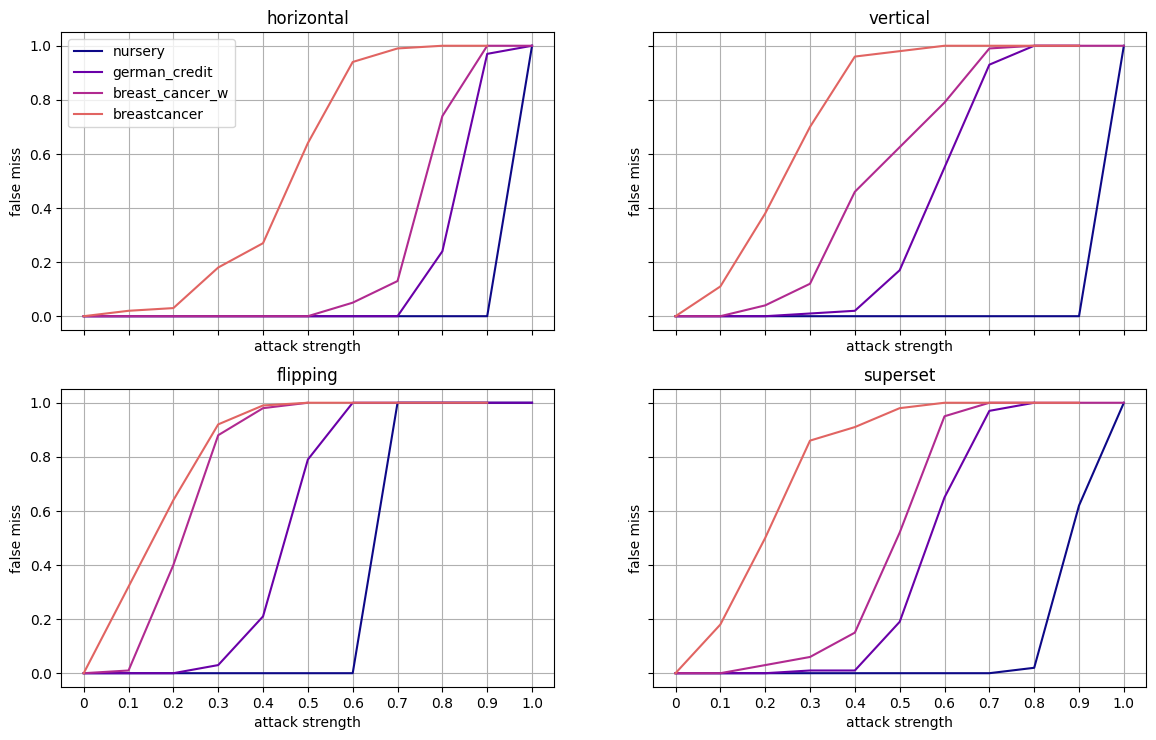

In [6]:
n_rows = 2; n_cols = 2
fig, axs = plt.subplots(n_rows,n_cols, figsize=(14,8.5), sharey=True, sharex=True)
cmap = matplotlib.cm.get_cmap('plasma') # autumn
colors = [cmap(i*(1/5)) for i in range(6)] 
for ax_row in axs:
    for ax in ax_row:
        ax.set_prop_cycle(color=colors) # color coding by baseline performance (darker->better performing model)
        
# RELATIVE LOSS
for i, attack in enumerate(attacks):
    for data in datasets:
        if True:#data=='breast_cancer_w' or data=='nursery' or data=='german_credit':
            axs[i//n_cols][i%n_cols].plot(false_miss[attack][data].keys(), 
                                          false_miss[attack][data].values(),
                                         label=data)
            axs[i//n_cols][i%n_cols].set_title(attack)

    
        
        #         if data == 'german_credit':
#             axs[i//n_cols][i%n_cols].plot(x_german_credit, rel_loss[data][model], label=models[model])
#             axs[i//n_cols][i%n_cols].set_title(data)
#             continue
#         #elif data == 'nursery':# or data=='breast_cancer': #or (data=='mushrooms' and model=='rf'):
#         #    continue
#         if model not in rel_loss[data] or len(rel_loss[data][model]) != len(x):
#             print(data, model)
#             continue
#         axs[i//n_cols][i%n_cols].plot(x, rel_loss[data][model], label=models[model])

for ax_row in axs:
    for ax in ax_row:   
        ax.set_xlabel('attack strength')
        ax.set_ylabel('false miss')
        ax.grid()
axs[0][0].legend()

#fig.suptitle('Loss in performance per data set', fontsize=20)

plt.savefig('robustness_summary.svg')
plt.savefig('robustness_summary.png')